**Penguin Classification**

##### Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### ML Libraries

In [71]:
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import statsmodels.api as smapi

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [4]:
path = "C:/Users/miihi/Data/DecodR/Classification Regression/penguins_lter.csv"
df = pd.read_csv(path)
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [5]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

##### Dimensions

In [7]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 344
Number of columns: 17


##### Column names

In [8]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

##### Renaming The columns

In [9]:
df = df.rename(columns = lambda x : x.strip().lower())
df.columns

Index(['studyname', 'sample number', 'species', 'region', 'island', 'stage',
       'individual id', 'clutch completion', 'date egg', 'culmen length (mm)',
       'culmen depth (mm)', 'flipper length (mm)', 'body mass (g)', 'sex',
       'delta 15 n (o/oo)', 'delta 13 c (o/oo)', 'comments'],
      dtype='object')

In [10]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

##### Replacing "." by "MALE"

In [11]:
df['sex'] = df['sex'].replace(to_replace=".", value = "MALE")

In [12]:
df['sex'].value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [13]:
df['comments'].value_counts()

Nest never observed with full clutch.                                   13
Not enough blood for isotopes.                                           6
No blood sample obtained.                                                2
No blood sample obtained for sexing.                                     2
Nest never observed with full clutch. Not enough blood for isotopes.     1
Sexing primers did not amplify. Not enough blood for isotopes.           1
Adult not sampled.                                                       1
Name: comments, dtype: int64

In [14]:
df = df.drop(columns=[ 'sample number', 'region', 'stage', 'individual id',
                     'date egg', 'comments'])
df.columns

Index(['studyname', 'species', 'island', 'clutch completion',
       'culmen length (mm)', 'culmen depth (mm)', 'flipper length (mm)',
       'body mass (g)', 'sex', 'delta 15 n (o/oo)', 'delta 13 c (o/oo)'],
      dtype='object')

##### Shuffle the data
We need to shuffle the data since all the species are noted together, so while splitting the data, we get a we shuffled data

In [15]:
df = df.sample(frac= 1)

In [16]:
df.head()  ### Rows are shuffeled

,studyname,species,island,clutch completion,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex,delta 15 n (o/oo),delta 13 c (o/oo)
151,PAL0910,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,41.5,18.5,201.0,4000.0,MALE,8.89640,-26.06967
289,PAL0809,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.7,15.0,223.0,5550.0,MALE,8.63551,-26.74249
29,PAL0708,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,40.5,18.9,180.0,3950.0,MALE,8.90027,-25.11609
138,PAL0910,Adelie Penguin (Pygoscelis adeliae),Dream,No,37.0,16.5,185.0,3400.0,FEMALE,8.61651,-26.07021
250,PAL0708,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,5250.0,MALE,NaN,NaN


##### Visualizing the Species Column

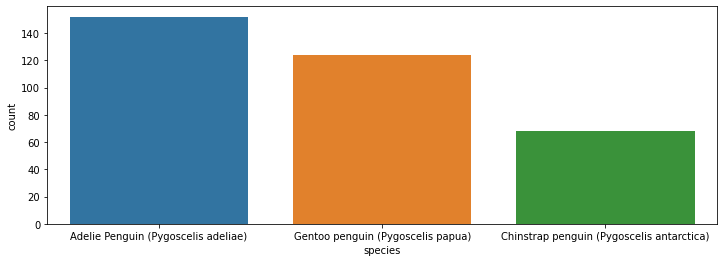

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(x = df['species'])
plt.show()

##### PIE CHARTS

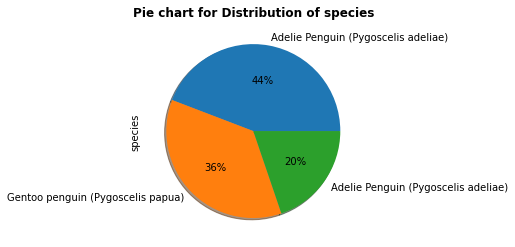

In [18]:
df.species.value_counts().plot.pie(labels = df.species, shadow = True,
                                   autopct = '%.0f%%')
                                   
plt.title("Pie chart for Distribution of species", fontweight = 'bold')
plt.show()

In [19]:
df.isna().sum()

studyname               0
species                 0
island                  0
clutch completion       0
culmen length (mm)      2
culmen depth (mm)       2
flipper length (mm)     2
body mass (g)           2
sex                    10
delta 15 n (o/oo)      14
delta 13 c (o/oo)      13
dtype: int64

In [20]:
#### IMPUTING THE VALUES FOR FACTOR VARIABLE
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [21]:
df.isna().sum()

studyname               0
species                 0
island                  0
clutch completion       0
culmen length (mm)      2
culmen depth (mm)       2
flipper length (mm)     2
body mass (g)           2
sex                     0
delta 15 n (o/oo)      14
delta 13 c (o/oo)      13
dtype: int64

##### Sex Dsitribution of Penguins

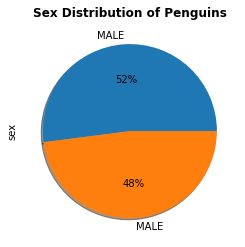

In [22]:
df.sex.value_counts().plot.pie(labels = df.sex, shadow = True, autopct = '%.0f%%')

plt.title("Sex Distribution of Penguins", fontweight = 'bold')
plt.show()

##### label Encoding 

In [23]:
df['clutch completion'].value_counts()

Yes    308
No      36
Name: clutch completion, dtype: int64

In [24]:
# Allpying Label Encoder for Clutch Completion Column

encode= LabelEncoder()

df['clutch completion'] = encode.fit_transform(df['clutch completion'])



In [25]:
df['clutch completion'].value_counts()

1    308
0     36
Name: clutch completion, dtype: int64

In [75]:
df['sex'] = encode.fit_transform(df['sex'])
df.sex.value_counts()

1    179
0    165
Name: sex, dtype: int64

**Using Iterative Imputer for imputing null values**

In [26]:
df.dtypes

studyname               object
species                 object
island                  object
clutch completion        int32
culmen length (mm)     float64
culmen depth (mm)      float64
flipper length (mm)    float64
body mass (g)          float64
sex                     object
delta 15 n (o/oo)      float64
delta 13 c (o/oo)      float64
dtype: object

In [78]:
Y = df['species'].to_frame()
X = df.drop('species', axis = 1)

In [29]:
X.head(2)


,studyname,island,clutch completion,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex,delta 15 n (o/oo),delta 13 c (o/oo)
151,PAL0910,Dream,1,41.5,18.5,201.0,4000.0,MALE,8.89640,-26.06967
289,PAL0809,Biscoe,1,50.7,15.0,223.0,5550.0,MALE,8.63551,-26.74249


In [32]:
Y.head(2)

,species
151,Adelie Penguin (Pygoscelis adeliae)
289,Gentoo penguin (Pygoscelis papua)


###### Imputing for numeric variables

In [33]:
impute = IterativeImputer(estimator=LinearRegression())

In [34]:
X.columns

Index(['studyname', 'island', 'clutch completion', 'culmen length (mm)',
       'culmen depth (mm)', 'flipper length (mm)', 'body mass (g)', 'sex',
       'delta 15 n (o/oo)', 'delta 13 c (o/oo)'],
      dtype='object')

In [107]:
numcol = X.select_dtypes(include=np.number).columns.values

In [108]:
numcol

array(['clutch completion', 'culmen length (mm)', 'culmen depth (mm)',
       'flipper length (mm)', 'body mass (g)', 'sex', 'delta 15 n (o/oo)',
       'delta 13 c (o/oo)'], dtype=object)

In [109]:
X[['clutch completion', 'culmen length (mm)', 'culmen depth (mm)',
       'flipper length (mm)', 'body mass (g)', 'delta 15 n (o/oo)',
       'delta 13 c (o/oo)']] = impute.fit_transform(X[['clutch completion', 'culmen length (mm)', 'culmen depth (mm)',
       'flipper length (mm)', 'body mass (g)', 'delta 15 n (o/oo)',
       'delta 13 c (o/oo)']])

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [110]:
X.isnull().sum().sum()

0

In [41]:
df.columns

Index(['studyname', 'species', 'island', 'clutch completion',
       'culmen length (mm)', 'culmen depth (mm)', 'flipper length (mm)',
       'body mass (g)', 'sex', 'delta 15 n (o/oo)', 'delta 13 c (o/oo)'],
      dtype='object')

###### HISTOGRAM

###### 1. Culmen Depth

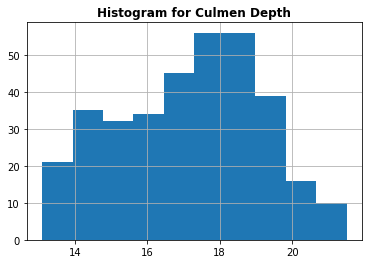

In [42]:
X['culmen depth (mm)'].hist()
plt.title("Histogram for Culmen Depth", fontweight = 'bold')
plt.show()


###### 2. Culmen Length

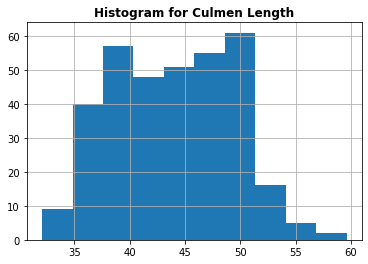

In [43]:
X['culmen length (mm)'].hist()
plt.title("Histogram for Culmen Length", fontweight = 'bold')
plt.show()

##### 3. Flipper Length

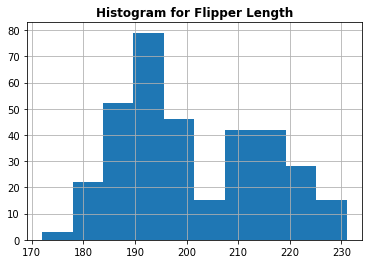

In [44]:
X['flipper length (mm)'].hist()
plt.title("Histogram for Flipper Length", fontweight = 'bold')
plt.show()

##### 4. Body Mass

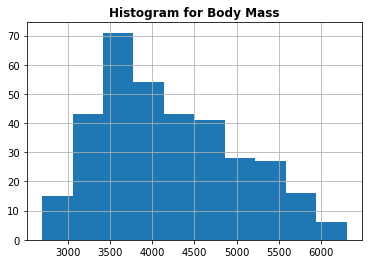

In [45]:
X['body mass (g)'].hist()
plt.title("Histogram for Body Mass", fontweight = 'bold')
plt.show()

##### 5. Delta 15 N


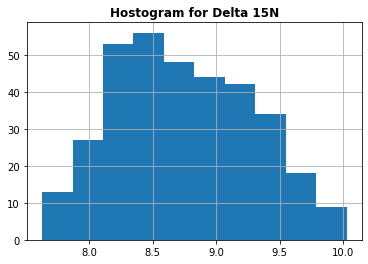

In [46]:
X['delta 15 n (o/oo)'].hist()
plt.title("Hostogram for Delta 15N", fontweight = 'bold')
plt.show()

##### 6. Delta 13 C

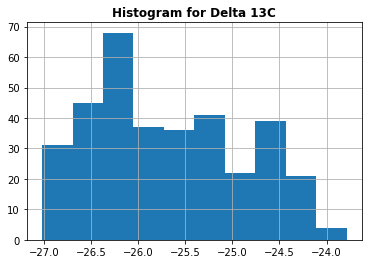

In [47]:
X['delta 13 c (o/oo)'].hist()
plt.title("Histogram for Delta 13C", fontweight = 'bold')
plt.show()

###### Scatter plots

In [50]:
X.columns

Index(['studyname', 'island', 'clutch completion', 'culmen length (mm)',
       'culmen depth (mm)', 'flipper length (mm)', 'body mass (g)', 'sex',
       'delta 15 n (o/oo)', 'delta 13 c (o/oo)'],
      dtype='object')

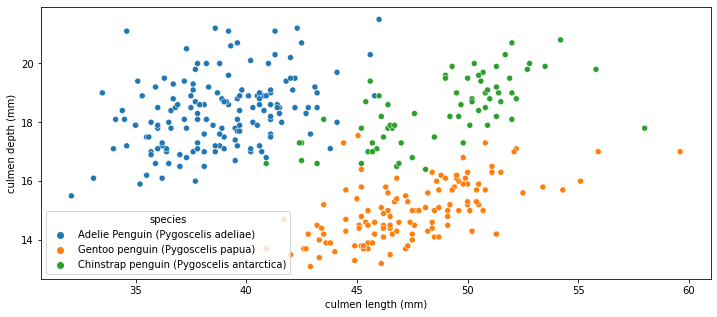

In [51]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x = X['culmen length (mm)'], y = X['culmen depth (mm)'],
                hue = df.species)
plt.show()

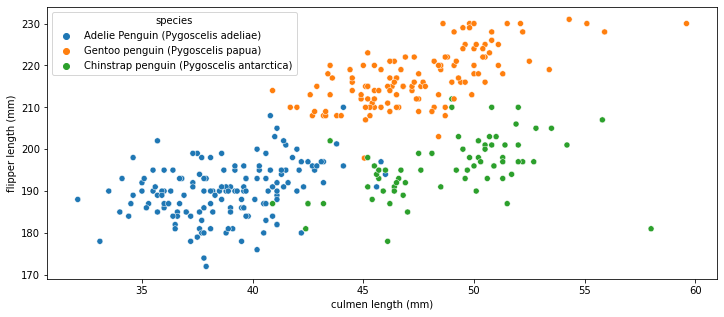

In [52]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x = X['culmen length (mm)'], y = X['flipper length (mm)'],
                hue = df.species)
plt.show()

##### Pairplot 

<Figure size 1800x1800 with 0 Axes>

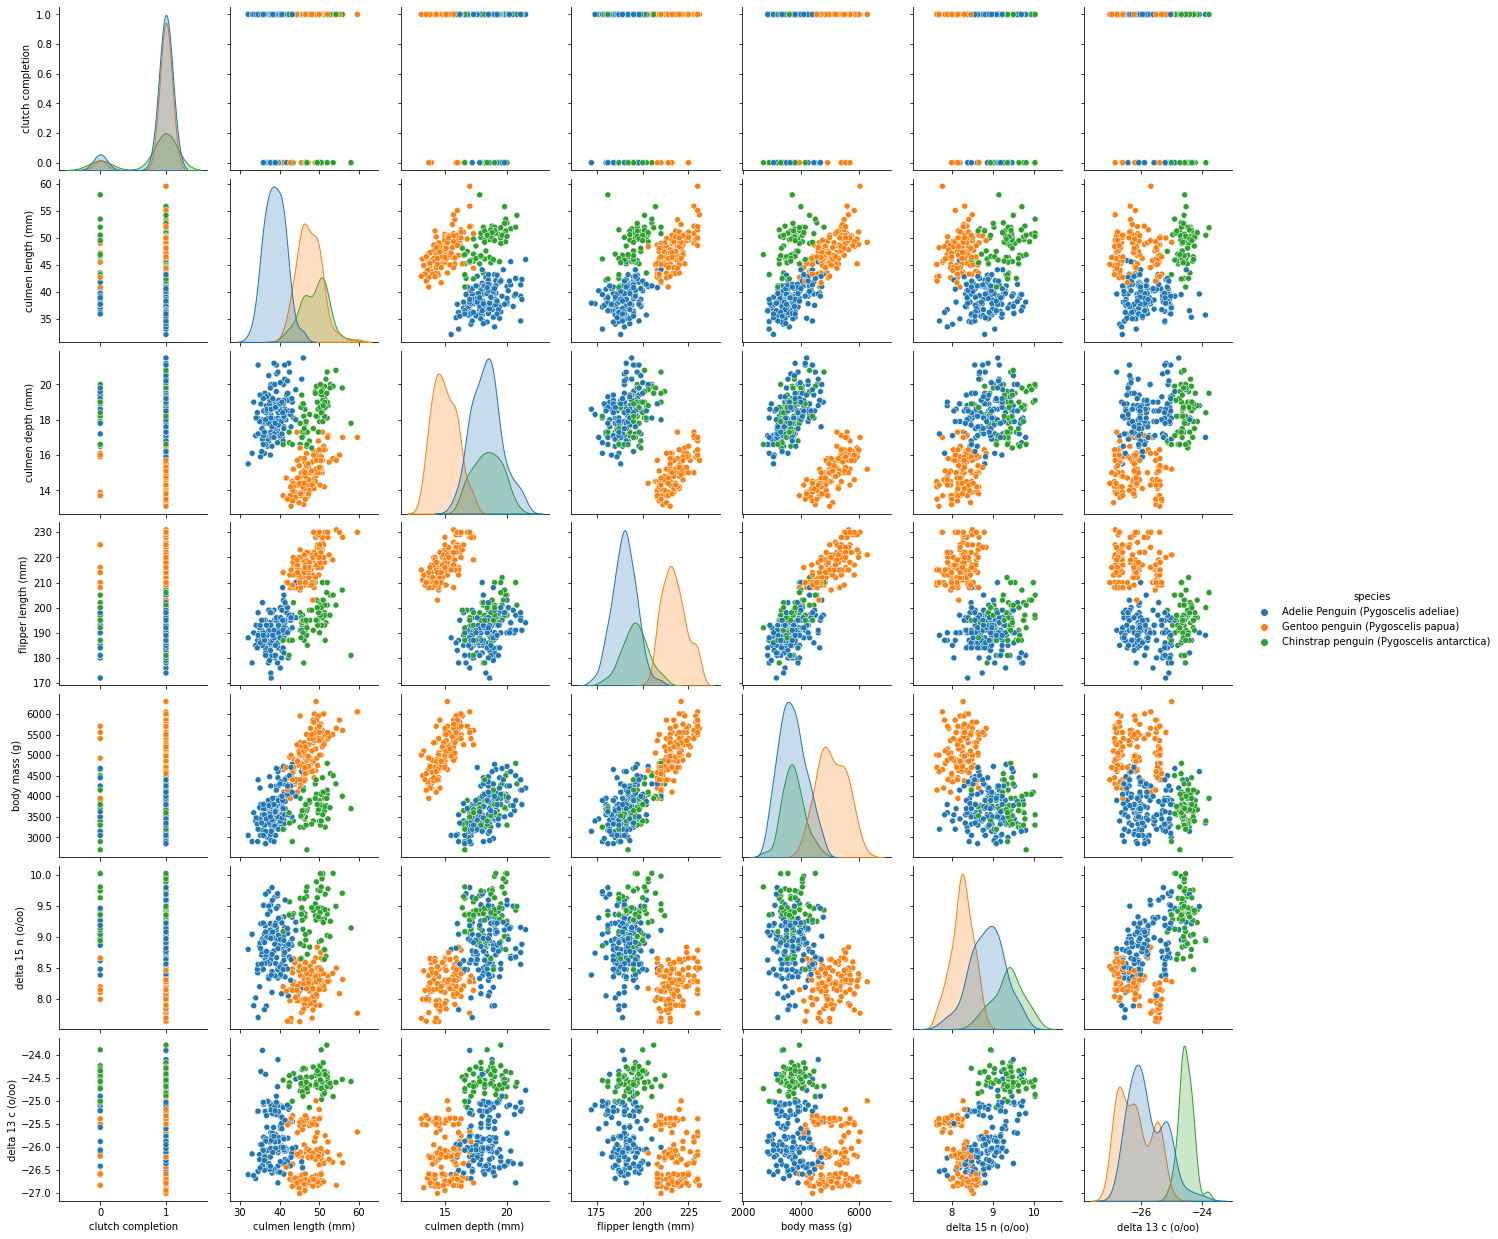

In [54]:
plt.figure(figsize=(25,25))
sns.pairplot(data = df, hue = 'species')
plt.show()

##### Violin plots

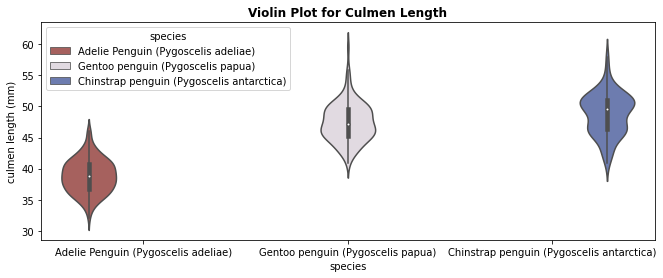

In [59]:
# 'Culmen Length (mm)',       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
plt.figure(figsize=(11,4))
sns.violinplot(x =df.species , y = X['culmen length (mm)'],  hue = df.species,
               palette="twilight_shifted_r")
plt.title("Violin Plot for Culmen Length", fontweight = 'bold')
plt.show()

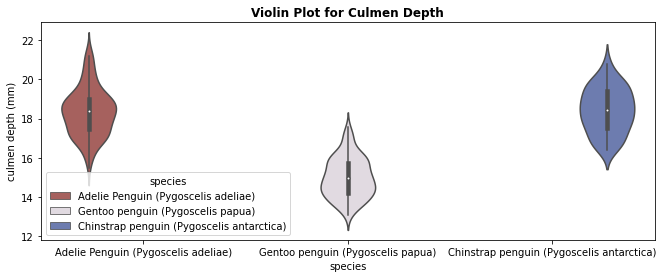

In [60]:
# 'Culmen Length (mm)',       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
plt.figure(figsize=(11,4))
sns.violinplot(x =df.species , y = X['culmen depth (mm)'],  hue = df.species,
               palette="twilight_shifted_r")
plt.title("Violin Plot for Culmen Depth", fontweight = 'bold')
plt.show()

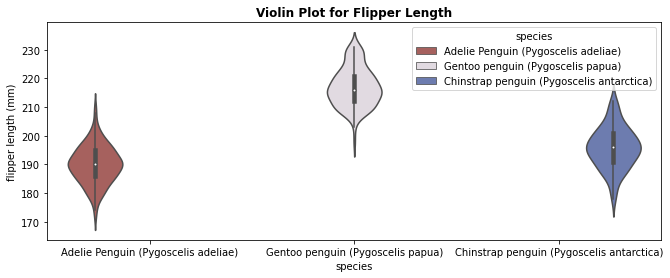

In [61]:
# 'Culmen Length (mm)',       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
plt.figure(figsize=(11,4))
sns.violinplot(x =df.species , y = X['flipper length (mm)'],  hue = df.species,
               palette="twilight_shifted_r")
plt.title("Violin Plot for Flipper Length", fontweight = 'bold')
plt.show()

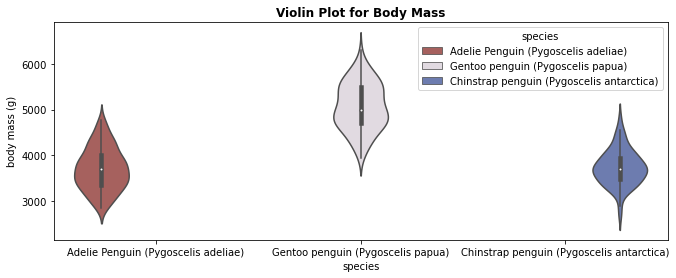

In [62]:
# 'Culmen Length (mm)',       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
plt.figure(figsize=(11,4))
sns.violinplot(x =df.species , y = X['body mass (g)'],  hue = df.species,
               palette="twilight_shifted_r")
plt.title("Violin Plot for Body Mass", fontweight = 'bold')
plt.show()

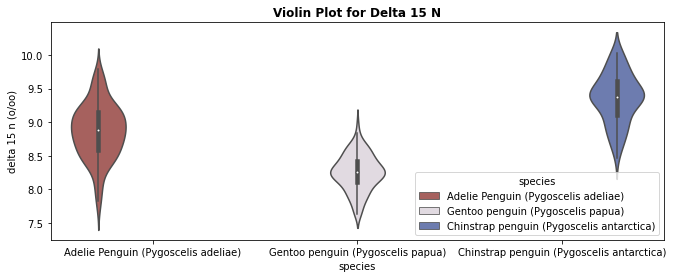

In [63]:
# 'Culmen Length (mm)',       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
plt.figure(figsize=(11,4))
sns.violinplot(x =df.species , y = X['delta 15 n (o/oo)'],  hue = df.species,
               palette="twilight_shifted_r")
plt.title("Violin Plot for Delta 15 N", fontweight = 'bold')
plt.show()

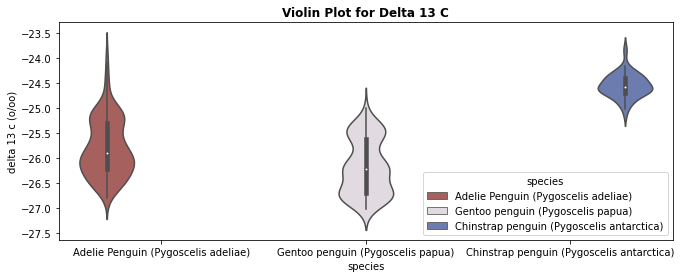

In [64]:
# 'Culmen Length (mm)',       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
plt.figure(figsize=(11,4))
sns.violinplot(x =df.species , y = X['delta 13 c (o/oo)'],  hue = df.species,
               palette="twilight_shifted_r")
plt.title("Violin Plot for Delta 13 C", fontweight = 'bold')
plt.show()

In [94]:
X.head()

,studyname,island,clutch completion,culmen length (mm),culmen depth (mm),flipper length (mm),body mass (g),sex,delta 15 n (o/oo),delta 13 c (o/oo)
151,1.0,Dream,1,41.5,18.5,201.0,4000.0,1,8.89640,-26.06967
289,1.0,Biscoe,1,50.7,15.0,223.0,5550.0,1,8.63551,-26.74249
29,0.0,Biscoe,0,40.5,18.9,180.0,3950.0,1,8.90027,-25.11609
138,0.0,Dream,0,37.0,16.5,185.0,3400.0,0,8.61651,-26.07021
250,1.0,Biscoe,1,47.3,15.3,222.0,5250.0,1,NaN,NaN


In [95]:
X.columns

Index(['studyname', 'island', 'clutch completion', 'culmen length (mm)',
       'culmen depth (mm)', 'flipper length (mm)', 'body mass (g)', 'sex',
       'delta 15 n (o/oo)', 'delta 13 c (o/oo)'],
      dtype='object')

In [86]:
X.studyname.value_counts()

PAL0910    120
PAL0809    114
PAL0708    110
Name: studyname, dtype: int64

In [101]:
X.drop(columns=['island'], inplace= True)

In [111]:
X.isna().sum()

clutch completion      0
culmen length (mm)     0
culmen depth (mm)      0
flipper length (mm)    0
body mass (g)          0
sex                    0
delta 15 n (o/oo)      0
delta 13 c (o/oo)      0
dtype: int64

###### Feature Scaling


In [82]:
scaled = StandardScaler()
scaled.fit_transform(X[['culmen length (mm)','culmen depth (mm)', 'flipper length (mm)',
                       'body mass (g)', 'delta 15 n (o/oo)', 'delta 13 c (o/oo)']])

array([[-0.44426069,  0.68402441,  0.00603906, -0.25194695,  0.2958946 ,
        -0.48359906],
       [ 1.2433185 , -1.09090994,  1.57286334,  1.68366286, -0.17764696,
        -1.33230381],
       [-0.62769321,  0.88687405, -1.48956593, -0.31438597,  0.30291904,
         0.71926036],
       ...,
       [-1.47148281,  1.03901128, -0.84859236, -0.50170305,  0.8884523 ,
         0.82187641],
       [ 0.54627492, -0.27951138, -0.63493451, -1.87536162,  1.94671034,
         1.19700841],
       [-0.92118525,  0.32903754, -1.41834665, -0.72023964,  0.82368952,
         0.59072225]])

##### Splitting the data for training 

In [112]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(X, Y, test_size = 0.2)

##### Model Building 

In [115]:
model = LogisticRegression().fit(train_x1, train_y1)

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miihi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
cut_off = 0.5
p1 = model1.predict(test_x1)
print(p1[0:6])

['Chinstrap penguin (Pygoscelis antarctica)'
 'Adelie Penguin (Pygoscelis adeliae)' 'Gentoo penguin (Pygoscelis papua)'
 'Adelie Penguin (Pygoscelis adeliae)' 'Gentoo penguin (Pygoscelis papua)'
 'Gentoo penguin (Pygoscelis papua)']


In [134]:
print(classification_report(test_y1, p1))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        29
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        14
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        26

                                 accuracy                           1.00        69
                                macro avg       1.00      1.00      1.00        69
                             weighted avg       1.00      1.00      1.00        69



In [135]:
metrics.accuracy_score(test_y1, p1)

1.0